In this jupyter notebook, I will be briefly looking through some historical trends based on the number of numbers and 
the number of comments of posts from NUSWhispers's website (https://www.nuswhispers.com). If you are not interested in the code, this will be at most be a  **3 minute read**.

The data was scraped using a Python command line application that I build, the Github repository of the code for the application can be found at https://github.com/yaofeng-wang/NUSWhispers_scraper. The data can be found at https://github.com/yaofeng-wang/NUSWhispers_scraper/tree/master/output. If you have any suggestion/criticism, please contact me at yaofeng96@gmail.com . 

In the following cells, I will refer to each post in NUSWhispers as a 'Whisper'. If you are not interested in the code,
feel free to skip the 'Data pre-processing' section that will follow immediately and proceed to the 'Overview of data' 
section.

### Data pre-processing

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from datetime import date, datetime
from dateutil.relativedelta import relativedelta

# Label each bar plot with the value on top of each bar
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def autolabel(rects, dtype):
    for rect in rects:
        height = rect.get_height()
        if dtype == 'int':
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom')
            
df53000to53999 = pd.read_excel("./posts53000to53999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df54000to54999 = pd.read_excel("./posts54000to54999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df55000to55999 = pd.read_excel("./posts55000to55999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df56000to56999 = pd.read_excel("./posts56000to56999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df57000to57999 = pd.read_excel("./posts57000to57999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df58000to58999 = pd.read_excel("./posts58000to58999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df59000to59999 = pd.read_excel("./posts59000to59999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df60000to60999 = pd.read_excel("./posts60000to60999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df61000to61999 = pd.read_excel("./posts61000to61999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df62000to62999 = pd.read_excel("./posts62000to62999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df63000to63999 = pd.read_excel("./posts63000to63999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df64000to64999 = pd.read_excel("./posts64000to64999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df65000to65999 = pd.read_excel("./posts65000to65999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df66000to66999 = pd.read_excel("./posts66000to66999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df67000to67999 = pd.read_excel("./posts67000to67999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])

df = pd.concat([df53000to53999, df54000to54999, df55000to55999, df56000to56999, df57000to57999, df58000to58999, 
                df59000to59999, df60000to60999, df61000to61999, df62000to62999, df63000to63999, df64000to64999, 
                df65000to65999, df66000to66999, df67000to67999], axis=0)

In [72]:
# Convert post_age to month-year string
# e.g. '2 months ago' becomes 'Jun-19'
#      '9 months ago' becomes 'Nov-18'
#      'a month ago' becomes  'Jul-19'
#      '2 hours ago' becomes  'Aug-19'
def get_post_age(x):
    first_word, second_word = x.split(" ")[0], x.split(" ")[1]
    current_date = date(year=2019,month=8,day=1)
    post_posted_on = None
    if second_word == 'months':
        post_posted_on = current_date -  relativedelta(months=int(first_word))
    elif second_word == 'month':
        post_posted_on = current_date -  relativedelta(months=1)
    else:
        post_posted_on = current_date
    return post_posted_on.strftime("%b-%y")
        
# https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name/48043319
months = ["Oct-18", "Nov-18", "Dec-18", "Jan-19", "Feb-19", "Mar-19", "Apr-19", "May-19", "Jun-19", "Jul-19", "Aug-19"]
df['month'] = pd.Categorical(df['post_age'].apply(get_post_age), categories=months, ordered=True)

# Process category.
df['categories'] = df['categories'].replace(np.nan, 'no category')
for cat in ['Lost and Found', 'Romance', 'Advice', 'Rant', 'Nostalgia', 'Funny']:
    df['category_' + cat] = df['categories'].apply(lambda x: 1 if cat in x else 0)
    
# There were some Whispers without num_likes 57766, 57778, 57784, 57787, 57792, 57877, 57879
# Unable to find posts on Facebook
df['num_likes'] = df['num_likes'].apply(lambda x: 0 if x == 'None' else int(x))

### Overview of data

There are 6 categories created by and assigned by the NUSWhispers team:
1. Lost and Found
2. Romance
3. Advice
4. Rant
5. Nostalgia
6. Funny


Each Whisper can have more than 1 category and there are Whispers that do not have a category.

Let us start by taking a look at the summary for each category.



In [45]:
df.describe()[['category_Lost and Found', 'category_Romance', 'category_Advice', 'category_Rant', 'category_Nostalgia', 'category_Funny' ]]

,category_Lost and Found,category_Romance,category_Advice,category_Rant,category_Nostalgia,category_Funny
count,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000
mean,0.024625,0.120046,0.460754,0.229704,0.020200,0.044440
std,0.154994,0.325047,0.498505,0.420683,0.140698,0.206091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the mean value for each category, 'Advice' is the most popular category.

Next, let's look at the number of Whispers separated by category and month.

Since each post can have more than zero or more than 1 category, I have extracted the individual categories for each Whispers in a way such that 1 post could contribute to an increase in count in more than 1 category.
In other words, the total number of Whispers for each month shown below is not equals to the total number of 
Whispers for that month.

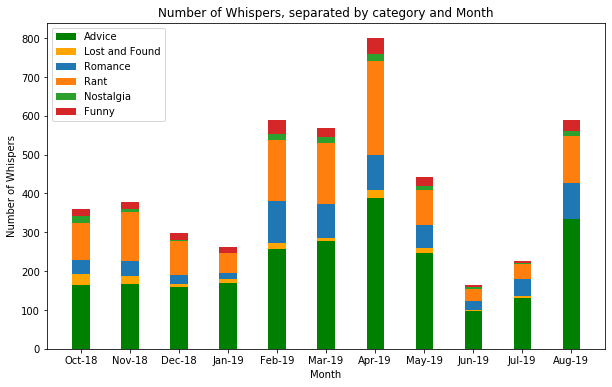

In [46]:
df2 = df.groupby(['month', 'category_Advice'], as_index=False).size().reset_index()
df3 = df.groupby(['month', 'category_Lost and Found'], as_index=False).size().reset_index()
df4 = pd.DataFrame([['Jun', 1, 0]], columns = ['month','category_Lost and Found',0]) 
df3 = df3.append(df4)
df5 = df.groupby(['month', 'category_Romance'], as_index=False).size().reset_index()
df6 = df.groupby(['month', 'category_Rant'], as_index=False).size().reset_index()
df7 = df.groupby(['month', 'category_Nostalgia'], as_index=False).size().reset_index()
df8 = df.groupby(['month', 'category_Funny'], as_index=False).size().reset_index()

width = 0.35

landf = df3.loc[df3['category_Lost and Found'] == 1, 0].values
a = df2.loc[df2['category_Advice'] == 1, 0].values
ro = df5.loc[df5['category_Romance'] == 1, 0].values
ra = df6.loc[df6['category_Rant'] == 1, 0].values
n = df7.loc[df7['category_Nostalgia'] == 1, 0].values
f = df8.loc[df8['category_Funny'] == 1, 0].values

plt.figure(figsize=(10, 6))
p1 = plt.bar(months, a, width, color='green')
p2 = plt.bar(months, landf, width, bottom = a, color='orange')
p3 = plt.bar(months, ro, width, bottom = a + landf)
p4 = plt.bar(months, ra, width, bottom = a + landf + ro)
p5 = plt.bar(months, n, width, bottom = a + landf + ro + ra)
p6 = plt.bar(months, f, width, bottom = a + landf + ro + ra +n)

plt.ylabel('Number of Whispers')
plt.xlabel('Month')
plt.title('Number of Whispers, separated by category and Month')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Advice','Lost and Found', 'Romance', 'Rant', 'Nostalgia', 'Funny'))

From the plot above, it seems that 'Advice' is the most popular category and perhaps followed by 'Rant'. This observation is consistent with the summary that we have seen earlier.

There doesn't seem to be a clear trend in the number of post for each of the categories.

Let's look at the average number of likes, separated by category and month

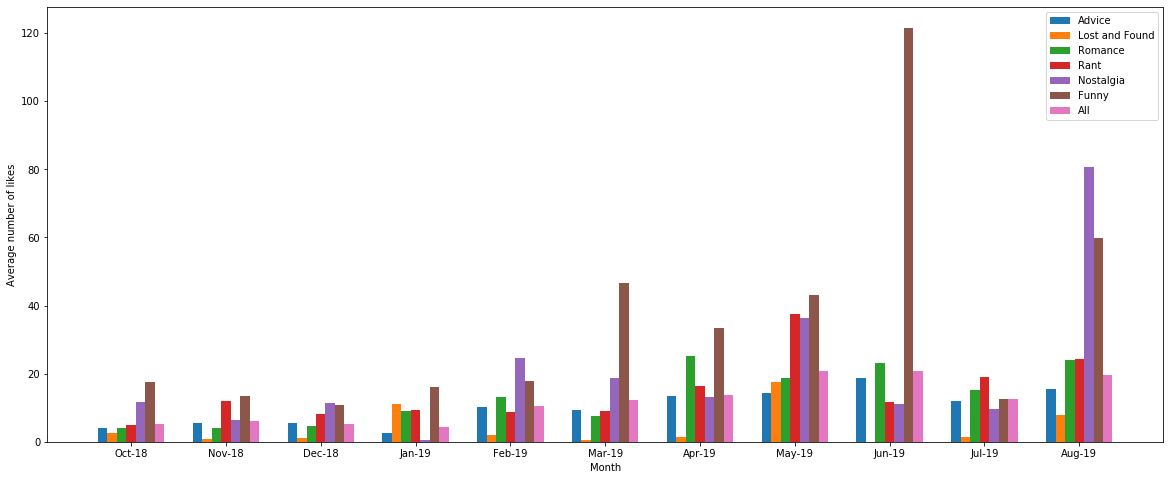

In [82]:
df2 = df.groupby(['month', 'category_Advice'], as_index=False).agg({'num_likes':'mean'})
df3 = df.groupby(['month', 'category_Lost and Found'], as_index=False).mean()[['month', 'num_likes','category_Lost and Found']]
df3['num_likes'].fillna(0, inplace=True)
df5 = df.groupby(['month', 'category_Romance'], as_index=False).agg({'num_likes':'mean'})
df6 = df.groupby(['month', 'category_Rant'], as_index=False).agg({'num_likes':'mean'})
df7 = df.groupby(['month', 'category_Nostalgia'], as_index=False).mean()[['month', 'num_likes','category_Nostalgia']]
df7['num_likes'].fillna(0, inplace=True)
df8 = df.groupby(['month', 'category_Funny'], as_index=False).agg({'num_likes':'mean'})
df9 = df.groupby(['month'], as_index=False).agg({'num_likes':'mean'})
width = 0.1

landf = df3.loc[df3['category_Lost and Found'] == 1, 'num_likes'].values
a = df2.loc[df2['category_Advice'] == 1, 'num_likes'].values
ro = df5.loc[df5['category_Romance'] == 1, 'num_likes'].values
ra = df6.loc[df6['category_Rant'] == 1, 'num_likes'].values
n = df7.loc[df7['category_Nostalgia'] == 1, 'num_likes'].values
f = df8.loc[df8['category_Funny'] == 1, 'num_likes'].values
ave = df9['num_likes'].values

plt.figure(figsize=(20, 8))
axis = plt.gca()
x = np.arange(len(months))
p1 = plt.bar(x-3*width, a, width)
p2 = plt.bar(x-2*width, landf, width)
p3 = plt.bar(x-width, ro, width)
p4 = plt.bar(x, ra, width)
p5 = plt.bar(x+width, n, width)
p6 = plt.bar(x+2*width, f, width)
p7 = plt.bar(x+3*width, ave, width)

plt.ylabel('Average number of likes')
plt.xlabel('Month')
plt.xticks(x)
axis.set_xticklabels(months)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('Advice','Lost and Found', 'Romance', 'Rant', 'Nostalgia', 'Funny','All'))

Clearly, there are some outliers. 

A notable outlier for the month of Jun-19, with category that consists of 'Funny': https://www.nuswhispers.com/tag/64156

A notable outlier for the month of Aug-19, with category that consists of 'Nostalgia': https://www.nuswhispers.com/tag/66150

Another notable outlier for the month of Aug-19, with category that consists of 'Nostalgia': https://www.nuswhispers.com/tag/67095

Thank you for looking through this jupyter notebook! Once again If you have any suggestion/criticism, please contact me at yaofeng96@gmail.com. Have a good day :) (Last update: 12-Aug-2019)